In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 as cv

Code di atas berguna untuk mengimport beberapa library yang berada di Python yaitu numpy, matplotlib pyplot, matplotlib image, dan cv2 yang berguna untuk dapat menggunakan fungsi yang di sediakan dari library tersebut.

code di bawah ini berguna untuk mengambil image yang akan di pakai dan mengubahnya menjadi grayscale kemudian menampilkan gray imagenya

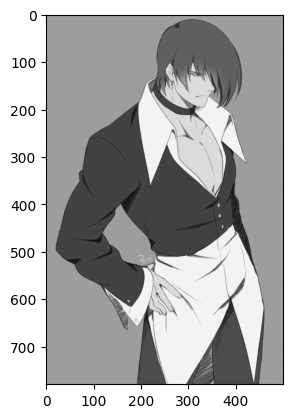

In [2]:
image = img.imread("IoriYagami.jpg")
gray_image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')

In [3]:
low_pass = np.array ([0.7, 0.7])  
high_pass = np.array ([-0.7, 0.7])

Kode di atas, low_pass dan high_pass, berguna untuk melakukan operasi filter dalam melakukan dekomposisi wavelet low_pass digunakan untuk memperhalus gambar atau menjaga komponen frekuensi rendah, sedangkan high_pass digunakan untuk menekan tepi gambar

In [4]:
def normalisasi(image):
    image_mininum = np.min(image)
    image_maximal = np.max(image)
    return (image - image_mininum) / (image_maximal - image_mininum) * 255

function di atas digunakan untuk melakukan normalisasi pada gambar yang di mana normalisasi adalah proses untuk mengubah rentang nilai piksel dalam gambar sehingga nilainya berada dalam rentang yang diinginkan, biasanya dari 0 hingga 255.

In [5]:
def baris_konvolusi(padding, filter, result):
    results = np.zeros(result.shape)
    
    for i in range (result.shape[0]):
        for j in range(result.shape[1]):
            for k in range(len(filter)):
                results[i][j] += (filter[k] * padding[i, j + k])
                
    return results

function di atas digunakan untuk melakukan operasi konvolusi satu dimensi pada suatu gambar atau matriks. Proses konvolusi ini melibatkan pergeseran filter di sepanjang baris gambar dan mengalikan elemen filter dengan elemen yang sesuai dalam baris gambar tersebut.

In [6]:
def kolom_konvolusi (padding, filter, result):
    baris, kolom =  result.shape
    hasil = np.zeros ((baris,kolom))
    
    for i in range (len(hasil)):
        for j in range (len(hasil[i])):
            for x in range (len(filter)):
                hasil[i][j] += (padding[i + x] [j] * filter[x])

    return hasil

function di atas digunakan untuk melakukan operasi konvolusi satu dimensi pada suatu gambar, Proses konvolusi ini melibatkan pergeseran filter di sepanjang baris gambar dan mengalikan elemen filter dengan elemen yang sesuai dalam baris gambar yang ditunjuk

In [7]:
def baris_bawah(image):
    if image.shape[0] % 2 == 1:
        image = image[:-1, :]
        
    return image[::2, :]

function di atas  bertujuan untuk mengambil setiap baris kedua dari suatu gambar, dengan cara menghapus baris terakhir jika jumlah baris gambar ganjil, dan kemudian mengambil setiap baris kedua secara berurutan, dimulai dari baris pertama

In [8]:
def kolom_bawah(image):
    if image.shape[1] % 2 == 1:
        image = image[:, :-1] 
        
    return image[:, ::2]

function di atas  bertujuan untuk mengambil setiap kolom kedua dari suatu gambar, dengan menghapus kolom terakhir jika jumlah kolom gambar ganjil, dan kemudian mengambil setiap kolom kedua secara berurutan, dimulai dari kolom pertama

In [9]:
def padding (temp, hasil):
    hasil = len(hasil) - 1
    padding = np.pad (temp , [0, hasil], 'constant')
    
    return padding

function di atas bertujuan untuk menambahkan padding pada gambar dengan ukuran padding yang ditentukan oleh hasil

In [10]:
def dekomposisi(hasil, temp, simpan, level):
    if level == 0:
        return hasil
    
    sisi = padding(hasil, temp)
    konvolusi_baris = baris_konvolusi(sisi, temp, hasil)
    
    down_bar = kolom_bawah(konvolusi_baris)
    pad_kolom = padding(down_bar, simpan)
    
    konvolusi_kolom = kolom_konvolusi(pad_kolom, simpan, down_bar)
    down_kol = baris_bawah(konvolusi_kolom)
    
    return dekomposisi(down_kol, temp, simpan, level - 1)

function di atas  adalah bagian dari proses dekomposisi dalam pengolahan citra dimana merupakan dekomposisi wavelet atau metode pengurangan resolusi multi-level.

In [11]:
def gabung(image, row, column):
    row_images = []
    for r in range(row):
        row_images.append(np.concatenate(image[r * column:(r + 1) * column], axis = 1))
    
    combined_image = np.concatenate(row_images, axis=0)
    return combined_image

function di atas bertujuan untuk menggabungkan beberapa gambar menjadi satu gambar yang lebih besar dengan susunan baris dan kolom yang ditentukan

In [12]:
Approximation = dekomposisi(gray_image, low_pass, low_pass, 1)
Horizontal = dekomposisi(gray_image, low_pass, high_pass, 1)
Vertical = dekomposisi(gray_image, high_pass, low_pass, 1)
Diagonal = dekomposisi(gray_image, high_pass, high_pass, 1)

normalisasi_Approximation = normalisasi(Approximation)
normalisasi_Horizontal = normalisasi(Horizontal)
normalisasi_Vertical = normalisasi(Vertical)
normalisasi_Diagonal = normalisasi(Diagonal)

image = [normalisasi_Approximation, normalisasi_Horizontal, normalisasi_Vertical, normalisasi_Diagonal]
gabung_img = gabung(image, 2, 2)

kode di atas melakukan dekomposisi citra grayscale gray_image menjadi empat sub-bagian menggunakan transformasi wavelet dua dimensi dengan filter low-pass dan high-pass. Hasil dekomposisi ini disimpan dalam variabel-variabel Approximation, Horizontal, Vertical, dan Diagonal.

Selanjutnya, setiap sub-bagian tersebut dinormalisasi menggunakan fungsi normalisasi. Normalisasi dilakukan untuk memastikan bahwa nilai-nilai piksel dalam setiap sub-bagian berada dalam rentang 0 hingga 255.

Setelah normalisasi, keempat sub-bagian yang telah dinormalisasi digabungkan kembali menjadi satu gambar menggunakan fungsi gabung, dengan pengaturan 2 baris dan 2 kolom. Hal ini menghasilkan satu gambar yang menampilkan keempat sub-bagian tersebut dalam susunan matriks 2x2

kode di bawah berguna untuk menampilkan lima gambar secara berdampingan dalam satu baris, dimana empat gambar pertama menunjukkan hasil dekomposisi, dan gambar terakhir menunjukkan hasil akhir penggabungan sub-bagian

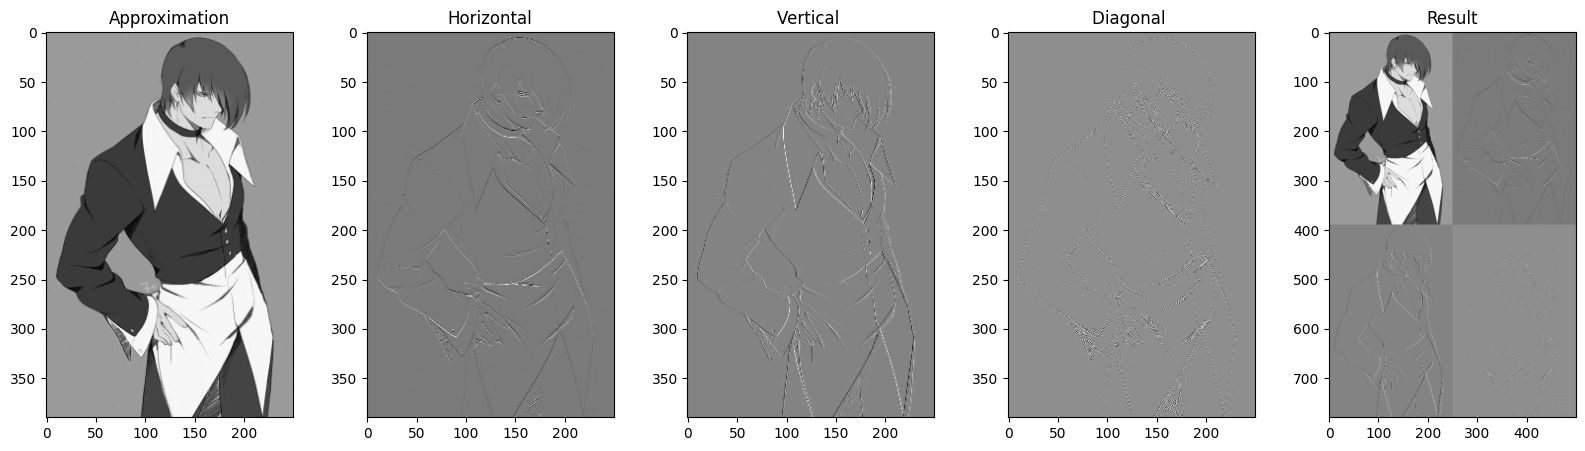

In [13]:
fig, axs = plt.subplots(1, 5, figsize = (20, 5))
axs[0].imshow(Approximation, cmap='gray'); axs[0].set_title('Approximation')
axs[1].imshow(Horizontal, cmap='gray'); axs[1].set_title('Horizontal')
axs[2].imshow(Vertical, cmap='gray'); axs[2].set_title('Vertical ')
axs[3].imshow(Diagonal, cmap='gray'); axs[3].set_title('Diagonal ')
axs[4].imshow(gabung_img, cmap='gray'); axs[4].set_title('Result')
plt.show()

In [14]:
def ubah(gambar_1, gambar_2):
    min_height = min(gambar_1.shape[0], gambar_2.shape[0])
    min_width = min(gambar_1.shape[1], gambar_2.shape[1])
    image1_resized = cv.resize(gambar_1, (min_width, min_height), interpolation=cv.INTER_AREA)
    image2_resized = cv.resize(gambar_2, (min_width, min_height), interpolation=cv.INTER_AREA)
    return image1_resized, image2_resized

function di atas bertujuan untuk mengubah ukuran dua gambar agar memiliki dimensi yang sama, dengan dimensi yang disesuaikan berdasarkan dimensi gambar yang lebih kecil di antara kedua gambar tersebut

In [15]:
def tampilan(LL, LH, HL, HH):
    LL, HL = ubah(LL, HL)
    LH, HH = ubah(LH, HH)
    baris_1 = np.concatenate((LL, HL), axis=1)
    baris_2 = np.concatenate((LH, HH), axis=1)
    result = np.concatenate((baris_1, baris_2), axis=0)
    return result

function di atas bertujuan untuk menyatukan empat sub-bagian hasil transformasi wavelet dua dimensi ke dalam satu gambar, yang akan menampilkan keempat jenis sub-bagian (LL, LH, HL, HH) 

In [16]:
def pilih_level(levels):
    gabung = levels[0]
    for level in levels[1:]:
        if isinstance(level, list):
            resized_images = [ubah(gabung, img)[1] for img in level]
            gabung = tampilan(gabung, *resized_images)
        else:
            gabung, level = ubah(gabung, level)
            gabung = tampilan(gabung, level, level, level) 
    return gabung

function di atas berguna untuk memilih level dekomposisi yang diinginkan dan menggabungkan sub-bagian hasil dekomposisi dari level-level tersebut menjadi satu gambar hasil akhir

kode di bawah berguna untuk menampilkan Final Result dari level awal sampai level yang di tentukan yaitu level 5 

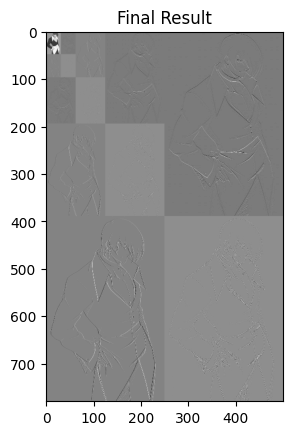

In [17]:
level_1 = gabung_img  
level_2 = tampilan(level_1, normalisasi_Horizontal, normalisasi_Vertical, normalisasi_Diagonal)
gabungs = pilih_level([level_2, [normalisasi_Vertical, normalisasi_Horizontal, normalisasi_Diagonal], [normalisasi_Vertical, normalisasi_Horizontal, normalisasi_Diagonal]])
plt.imshow(gabungs, cmap='gray')
plt.title('Final Result')
plt.show()

In [18]:
def rekonstruksi(LL, LH, HL, HH):
    timage, limage = LL.shape
    x = timage * 2
    y = limage * 2 
    image = np.zeros([x, y]) 
    normalisasi_Approximation = np.zeros([x, y])
    normalisasi_Horizontal = np.zeros([x, y])
    normalisasi_Vertical = np.zeros([x, y])
    normalisasi_Diagonal = np.zeros([x, y])
    
    for i in range(0, timage, 2):
        for j in range(0, limage, 2):
            normalisasi_Approximation[2 * i][2 * j] = LL[i][j]
            normalisasi_Horizontal[2 * i][2 * j] = LH[i][j]
            normalisasi_Vertical[2 * i][2 * j] = HL[i][j]
            normalisasi_Diagonal[2 * i][2 * j] = HH[i][j]
    
    for i in range(1, x, 2):
        for j in range(y):
            normalisasi_Approximation[i][j] = normalisasi_Approximation[i - 1][j]
            normalisasi_Horizontal[i][j] = normalisasi_Horizontal[i][j] - normalisasi_Vertical[i - 1][j]
            normalisasi_Vertical[i][j] = normalisasi_Horizontal[i - 1][j]
            normalisasi_Diagonal[i][j] = normalisasi_Diagonal[i][j] - normalisasi_Diagonal[i - 1][j]
    
    for i in range(x):
        for j in range(1, y, 2):
            normalisasi_Approximation[i][j] = normalisasi_Approximation[i][j - 1]
            normalisasi_Horizontal[i][j] = normalisasi_Vertical[i][j - 1]
            normalisasi_Vertical[i][j] = normalisasi_Vertical[i][j] - normalisasi_Horizontal[i][j - 1]
            normalisasi_Diagonal[i][j] = normalisasi_Diagonal[i][j] - normalisasi_Diagonal[i][j -1 ]
    
    for i in range(x):
        for j in range(y):
            image[i][j] += (normalisasi_Approximation[i][j] + normalisasi_Horizontal[i][j] + normalisasi_Vertical[i][j] + normalisasi_Diagonal[i][j])
    return image

function di atas  berguna untuk merekonstruksi citra asli dari empat sub-bagian hasil transformasi wavelet dua dimensi (LL, LH, HL, HH). Proses rekonstruksi dilakukan dengan mengembalikan nilai piksel dari setiap sub-bagian ke posisi asalnya dalam citra asli, sesuai dengan aturan rekonstruksi yang didefinisikan untuk transformasi wavelet

kode di bawah berguna untuk menampilkan hasil rekronstruksi dari gambar di atas yaitu gabungs

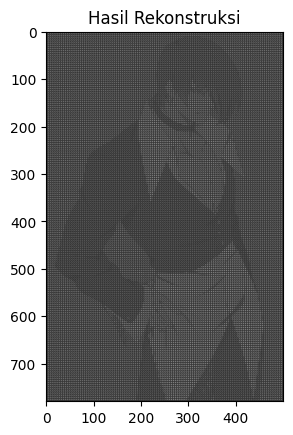

In [19]:
hasil_rekonstruksi = rekonstruksi(normalisasi_Approximation, normalisasi_Horizontal, normalisasi_Vertical, normalisasi_Diagonal)

plt.imshow(hasil_rekonstruksi, cmap='gray')
plt.title("Hasil Rekonstruksi")
plt.show()


Kode di bawah melakukan dekomposisi citra grayscale gray_image menjadi empat sub-bagian menggunakan transformasi wavelet dua dimensi dengan filter low-pass dan high-pass, dengan tingkat dekomposisi sebanyak 6 level. Hasil dekomposisi tersebut disimpan dalam variabel-variabel Approximation, Horizontal, Vertical, dan Diagonal, masing-masing mewakili aproksimasi, detail horizontal, detail vertikal, dan detail diagonal dari citra asli

Sehingga subplot menampilkan salah satu jenis sub-bagian hasil dekomposisi (Aproksimasi, Horizontal, Vertikal, Diagonal) dalam citra grayscale. Konfigurasi ini memungkinkan pengguna untuk secara visual memahami bagaimana citra asli telah dibagi menjadi komponen aproksimasi dan detail pada berbagai arah

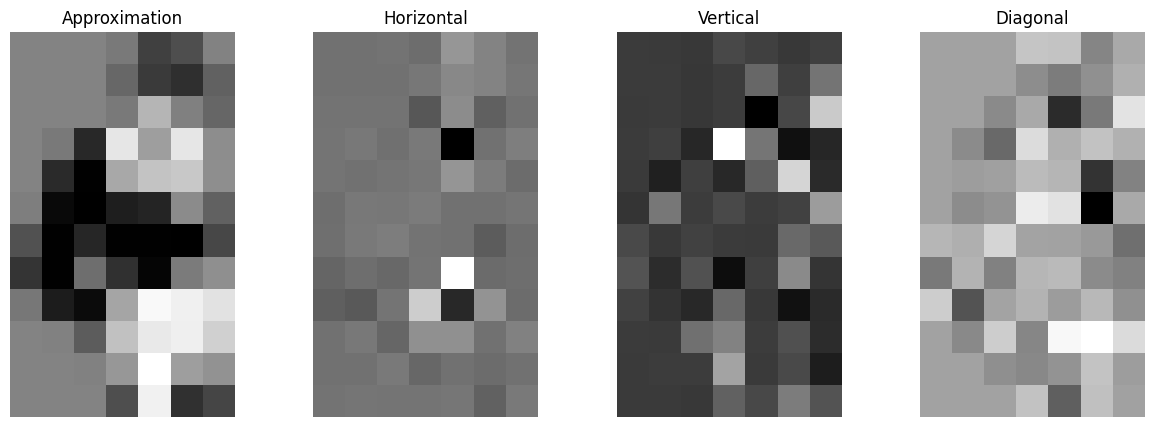

In [20]:
Approximation  = dekomposisi(gray_image, low_pass, low_pass, 6)
Horizontal = dekomposisi(gray_image, low_pass, high_pass, 6)
Vertical = dekomposisi(gray_image, high_pass, low_pass, 6)
Diagonal = dekomposisi(gray_image, high_pass, high_pass, 6)

fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(Approximation , cmap='gray')
axs[0].axis('off')  
axs[0].set_title('Approximation')

axs[1].imshow(Horizontal, cmap='gray')
axs[1].axis('off') 
axs[1].set_title('Horizontal')

axs[2].imshow(Vertical, cmap='gray')
axs[2].axis('off')  
axs[2].set_title('Vertical')

axs[3].imshow(Diagonal, cmap='gray')
axs[3].axis('off')  
axs[3].set_title('Diagonal')

plt.show()

In [21]:
def calculate_amplitude(image):
    height, width = image.shape
    amplitude_result = np.zeros((height * width))
    index = 0
    for i in range(height):
        for j in range(width):
            amplitude_result[index] = image[i][j]
            index += 1
    return amplitude_result

function di atas berguna untuk menghasilkan nilai amplitudo dari gambar yang diberikan dengan cara meleburkan matriks gambar menjadi larik satu dimensi

In [22]:
def visualize_amplitude(title, amplitude_result, color):
    plt.figure()
    plt.title(title)
    plt.plot(amplitude_result, color=color)
    plt.show()

function di atas berguna untuk membuat plot dari nilai amplitudo yang diberikan dengan warna yang ditentukan

kode di bawah berguna untuk menghitungdan memvisualisasikan amplitudo dari empat gambar yang berbeda yaitu amplitude_result1, amplitude_result2, amplitude_result3, dan amplitude_result4

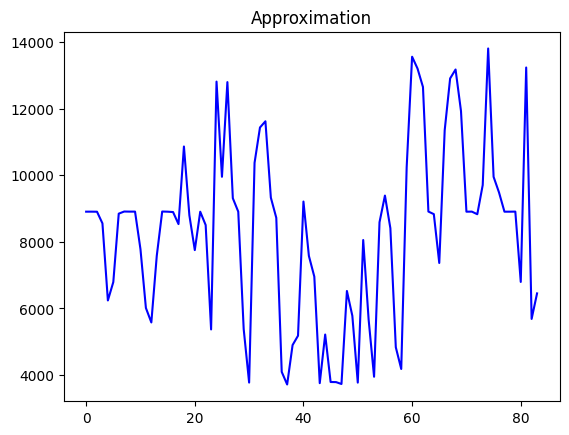

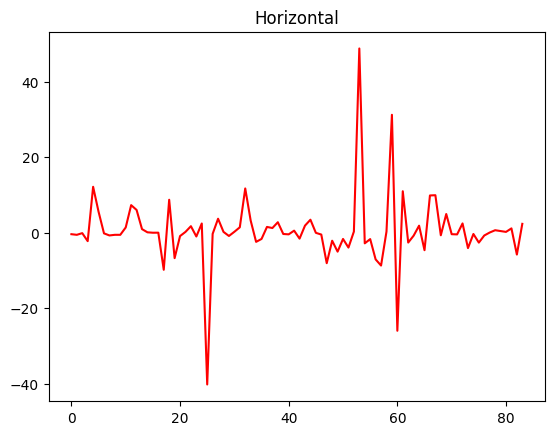

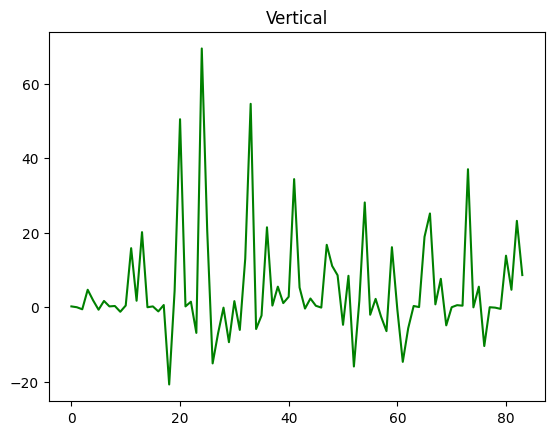

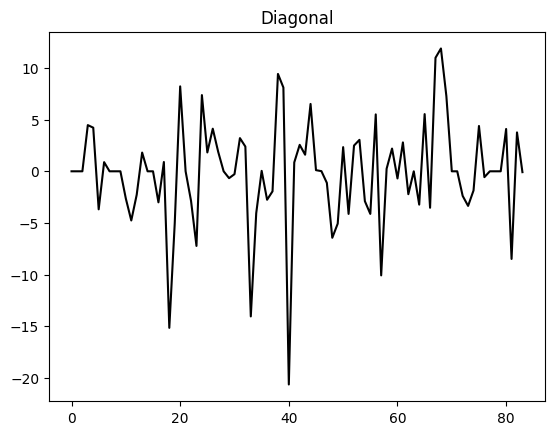

In [23]:
amplitude_result1 = calculate_amplitude(Approximation)
amplitude_result2 = calculate_amplitude(Horizontal)
amplitude_result3 = calculate_amplitude(Vertical)
amplitude_result4 = calculate_amplitude(Diagonal)

visualize_amplitude('Approximation', amplitude_result1, 'blue')
visualize_amplitude('Horizontal', amplitude_result2, 'red')
visualize_amplitude('Vertical', amplitude_result3, 'green')
visualize_amplitude('Diagonal', amplitude_result4, 'black')